# BackTest Result Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def find_file_by_suffix(directory, suffix):
    """Finds a file in the directory with a specific suffix."""
    files = glob.glob(os.path.join(directory, f"*{suffix}"))
    if files:
        return files[0]  # Return the first match
    else:
        raise FileNotFoundError(f"No file ending with {suffix} found in {directory}")

def safe_to_datetime(column):
    """Safely converts a column to datetime, handling inconsistent formats."""
    return pd.to_datetime(column, errors='coerce')


output_dir = '/home/vagrant/group_02_project/SMA_Reactive_Taker_Strategy/output'
fill_file = find_file_by_suffix(output_dir, "_fill.csv")
order_file = find_file_by_suffix(output_dir, "_order.csv")
pnl_file = find_file_by_suffix(output_dir, "_pnl.csv")

# Read CSV files
fill_df = pd.read_csv(fill_file)
order_df = pd.read_csv(order_file)
pnl_df = pd.read_csv(pnl_file)

# Convert time columns to datetime safely
pnl_df['Time'] = safe_to_datetime(pnl_df['Time'])
fill_df['TradeTime'] = safe_to_datetime(fill_df['TradeTime'])
order_df['EntryTime'] = safe_to_datetime(order_df['EntryTime'])

# Drop rows with invalid dates, if necessary
pnl_df = pnl_df.dropna(subset=['Time'])
fill_df = fill_df.dropna(subset=['TradeTime'])
order_df = order_df.dropna(subset=['EntryTime'])

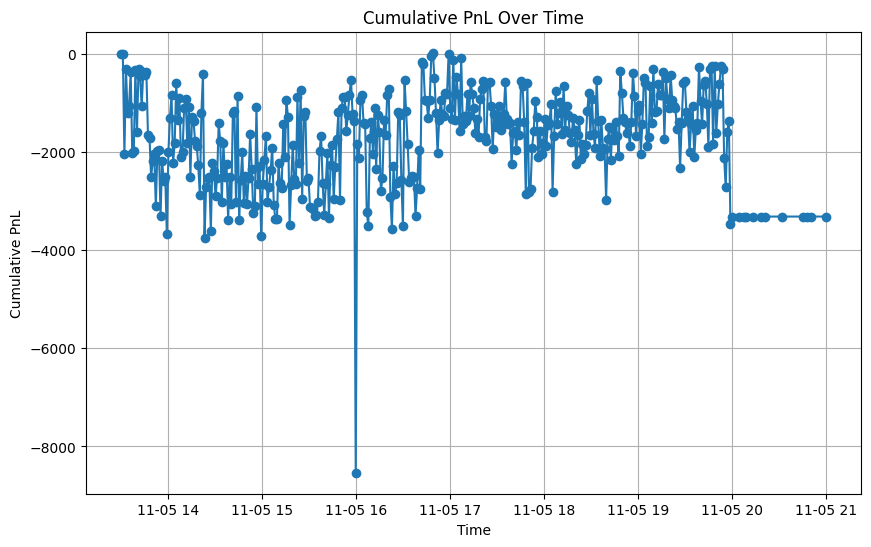

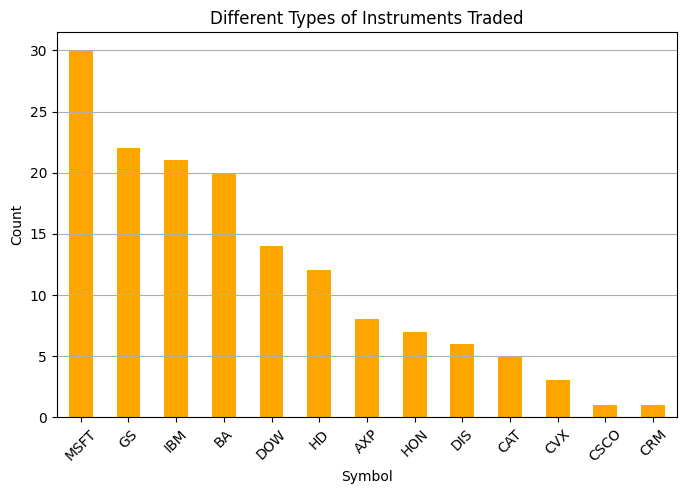

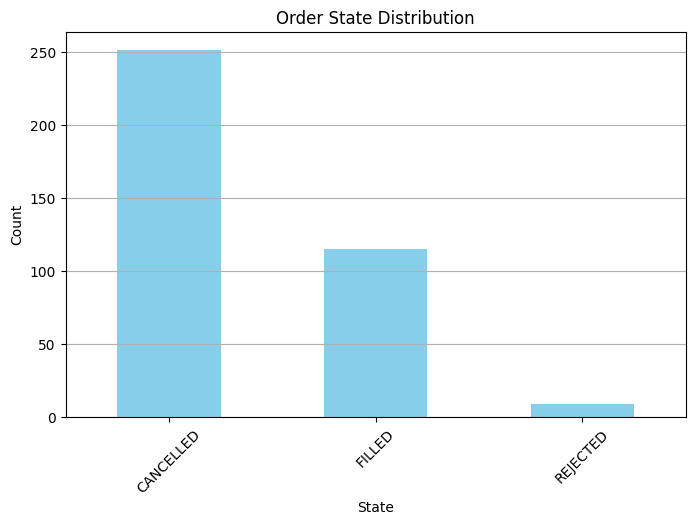

In [4]:
# Plot Cumulative PnL over Time
plt.figure(figsize=(10, 6))
plt.plot(pnl_df['Time'], pnl_df['Cumulative PnL'], marker='o')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.grid()
plt.show()

# Plot Different Types of Instruments (Symbols)
plt.figure(figsize=(8, 5))
symbol_counts = fill_df['Symbol'].value_counts()
symbol_counts.plot(kind='bar', color='orange')
plt.title('Different Types of Instruments Traded')
plt.xlabel('Symbol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot Order State Distribution
plt.figure(figsize=(8, 5))
state_counts = order_df['State'].value_counts()
state_counts.plot(kind='bar', color='skyblue')
plt.title('Order State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
